<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-метрики-качества-модели-sMAPE-(Symmetric-Mean-Absolute-Percentage-Error)" data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-метрики-качества-модели-sMAPE-(Symmetric-Mean-Absolute-Percentage-Error)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой метрики качества модели sMAPE (Symmetric Mean Absolute Percentage Error)</a></span></li><li><span><a href="#Определим-параметры-для-обучающей-выборки:" data-toc-modified-id="Определим-параметры-для-обучающей-выборки:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Определим параметры для обучающей выборки:</a></span></li><li><span><a href="#Исследуем-несколько-моделей-и-выберем-лучший-результат:" data-toc-modified-id="Исследуем-несколько-моделей-и-выберем-лучший-результат:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследуем несколько моделей и выберем лучший результат:</a></span><ul class="toc-item"><li><span><a href="#Для-линейной-регрессии" data-toc-modified-id="Для-линейной-регрессии-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Для линейной регрессии</a></span></li><li><span><a href="#Для-модели-Дерево-решений" data-toc-modified-id="Для-модели-Дерево-решений-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Для модели Дерево решений</a></span></li><li><span><a href="#Для-модели-Случайный-лес" data-toc-modified-id="Для-модели-Случайный-лес-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Для модели Случайный лес</a></span></li><li><span><a href="#Для-модели-Градиентного-бустинга" data-toc-modified-id="Для-модели-Градиентного-бустинга-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Для модели Градиентного бустинга</a></span></li></ul></li><li><span><a href="#Определим-параметры-для-для-тестовой-выборки:" data-toc-modified-id="Определим-параметры-для-для-тестовой-выборки:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Определим параметры для для тестовой выборки:</a></span></li><li><span><a href="#Посчитаем-sMAPE-для-тестовой-выборки:" data-toc-modified-id="Посчитаем-sMAPE-для-тестовой-выборки:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Посчитаем sMAPE для тестовой выборки:</a></span></li><li><span><a href="#Создадим-константную-модель,-чтобы-сравнить-ее-с-полученной." data-toc-modified-id="Создадим-константную-модель,-чтобы-сравнить-ее-с-полученной.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Создадим константную модель, чтобы сравнить ее с полученной.</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date',parse_dates=True)    # откроем файлы
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date',parse_dates=True)
full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date',parse_dates=True)

In [3]:
full.info() # ознакомимся с данными, исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

In [4]:
pd.set_option('display.max_rows', None)   # осуществим вывод полностью 

Избавимся от пропусков, заменив их предыдущими значениями:

In [5]:
train = train.fillna(method='bfill')
test = test.fillna(method='bfill')
full = full.fillna(method='bfill')

In [6]:
train.shape # размер обучающей выборки

(14149, 86)

In [7]:
test.shape # размер тестовой выборки

(5290, 52)

In [8]:
full.shape # размер исходной выборки

(19439, 86)

Вычислим эффективность обогащения (recovery) на обучающей выборке. <br>
Рассчитывается она по формуле: 
recovery = ((C * (F - T)) / (F * (C - T))) * 100%
где:<br>
C — доля золота в концентрате после флотации/очистки;<br>
F — доля золота в сырье/концентрате до флотации/очистки;<br>
T — доля золота в отвальных хвостах после флотации/очистки.<br>
Основываясь на полученных данных, необходимые нам признаки для проверки формулы это:<br>
rougher.output.concentrate_au (С)<br>
rougher.input.feed_au (F)<br>
rougher.output.tail_au (T)<br>
А сам результат работы формулы находится в столбце "rougher.output.recovery"<br>

In [9]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

In [10]:
recovery = ((C * (F - T)) / (F * (C - T))) * 100

Проверим, что она расчитана правильно. Построим гистограммы расчитанных значений и значений, представленных в выборке

<AxesSubplot:>

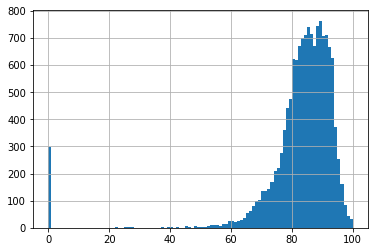

In [11]:
train['rougher.output.recovery'].hist(bins = 100)

<AxesSubplot:>

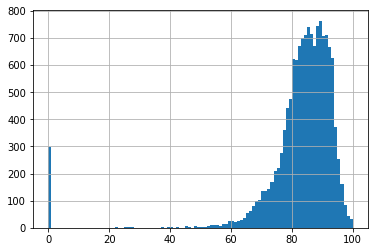

In [12]:
recovery.hist(bins = 100)

Видно, что на графиках нет различий между расчитанными значениями эффективности и полученной в выборке. Посчитаем MAE и оценим среднее абсолютное отклонение. 

In [13]:
MAE = mean_absolute_error(train['rougher.output.recovery'], recovery)
print("MAE:", MAE)

MAE: 9.73512347450521e-15


Среднее абсолютное отклонение ничтожно мало. Расчеты верны. 

Проанализируем признаки, недоступные в тестовой выборке:

In [14]:
missed_test_columns = set(list(train.columns.values))-set(list(test.columns.values))
missed_test_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Теперь добавим в тестовую выборку недостающие признаки: 

In [15]:
full_merged = full[["rougher.output.recovery", "final.output.recovery", "rougher.output.concentrate_au", "rougher.output.concentrate_ag", "rougher.output.concentrate_pb", "rougher.output.concentrate_sol", "final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb", "final.output.concentrate_sol"]]
test = test.merge(full_merged, on="date", how="left")

In [16]:
print(train.shape)
print(test.shape)

(14149, 86)
(5290, 62)


Теперь у нас есть готовые обучающая  и тестовая выборки. 

Некоторые параметры замеряются или рассчитываются значительно позже, поэтому их нет в тестсовой выборке. Также в тестовой выборке нет целевых признаков.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.


In [17]:
#подготовим датасет с необходимыми данными для золота
au_data = (full[[
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au']].copy())

In [18]:
#серебра
ag_data = (full[[
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag']].copy())

In [19]:
#свинца
pb_data = (full[[
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb']].copy())

In [20]:
def draw_hist (data, title):
    fig, ax = plt.subplots()
    ax.set_ylabel('Кол-во наблюдений')
    ax.set_xlabel('Концентрация металла')
    ax.set_title(title)
    for col in data:
        data[col].hist(alpha=.3) 
        ax.legend(['Исходное сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

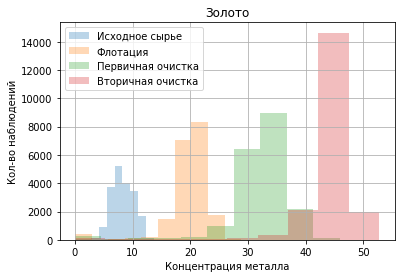

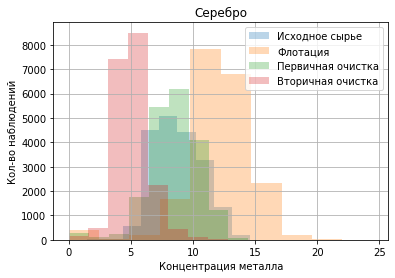

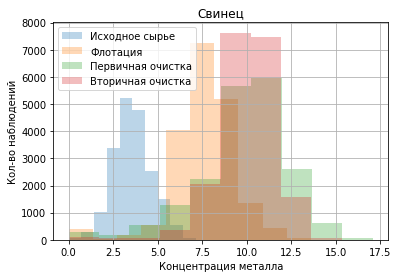

In [21]:
draw_hist(au_data, 'Золото') # Постоим графики
draw_hist(ag_data, 'Серебро')
draw_hist(pb_data, 'Свинец')

Из информации из графиков можно сделать выводы о том, что концентрация металлов с очисткой изменяется. У золота концентрация с очисткой ростет, у серебра концентрация ниже, чем до очистки, у свинци практически не меняется.  

Далее сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

В обучающей и тестовой выборках есть признаки primary_cleaner.input.feed_size, rougher.input.feed_size. Сравним их распределения. Если они будут отличаться,оценка модели будет не правильной. 

<AxesSubplot:>

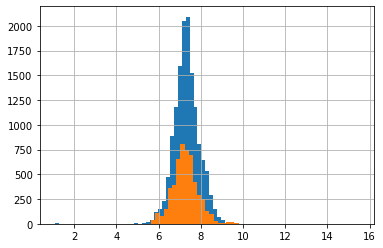

In [22]:
train['primary_cleaner.input.feed_size'].hist(bins = 50)
test['primary_cleaner.input.feed_size'].hist(bins = 50)

<AxesSubplot:>

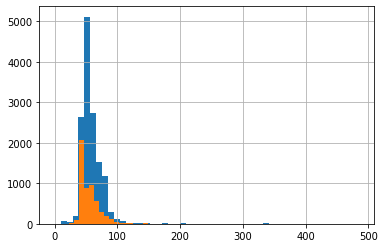

In [23]:
train['rougher.input.feed_size'].hist(bins = 50)
test['rougher.input.feed_size'].hist(bins = 50)

Распределения не сильно отличаются друг от друга, это не доолжно повлиять на оценку модели. 

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [24]:
#создадим новый датасет с данныим о концентрации веществ
con_data = full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', \
                 'rougher.input.feed_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', \
                 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', \
                 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol',\
                 'final.output.concentrate_au']].copy()
con_data.head(5)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au
date,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,36.808594,6.486150,8.547551,10.389648,19.529297,34.174427,6.055403,9.889648,5.507324,42.192020
2016-01-15 01:00:00,6.161113,2.266033,35.753385,6.478583,8.558743,10.497069,19.369147,34.118526,6.029369,9.968944,5.257781,42.701629
2016-01-15 02:00:00,6.116455,2.159622,35.971630,6.362222,8.603505,10.354494,19.167579,33.969464,6.055926,10.213995,5.383759,42.657501
2016-01-15 03:00:00,6.043309,2.037807,36.862241,6.118189,7.221879,8.496563,15.978538,28.260743,6.047977,9.977019,4.858634,42.689819
2016-01-15 04:00:00,6.060915,1.786875,34.347666,5.663707,9.089428,9.986786,19.199864,33.044932,6.148599,10.142511,4.939416,42.774141


In [25]:
# проссумируем концентрацию веществ на разной стадии
con_data['conc_sum_rougher'] = con_data['rougher.input.feed_ag'] + con_data['rougher.input.feed_pb'] + \
    con_data['rougher.input.feed_au']
con_data['conc_sum_primary'] = con_data['primary_cleaner.output.concentrate_ag'] +\
    con_data['primary_cleaner.output.concentrate_pb'] + con_data['primary_cleaner.output.concentrate_au']
con_data['conc_sum_final'] = con_data['final.output.concentrate_ag'] + con_data['final.output.concentrate_pb'] + \
    con_data['final.output.concentrate_au']

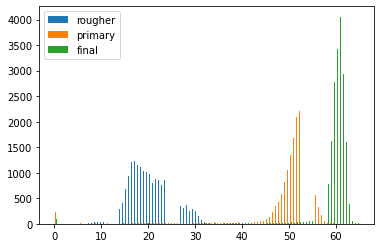

In [26]:
plt.hist([con_data['conc_sum_rougher'], con_data['conc_sum_primary'], con_data['conc_sum_final']], bins = 100, alpha=1, 
         label=['rougher', 'primary', 'final'])
#plt.figure(figsize = (10,8))
plt.legend()
plt.show()

In [27]:
display(test.shape)
display(train.shape)

(5290, 62)

(14149, 86)

На графике видны нулевые аномалии. Избавимся от них, получив чистые выборки:

In [28]:
features_rough_concentrate = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]

features_input_concentrate = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]
features_final_concentrate = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]

In [29]:
train = train[train[features_input_concentrate].sum(1) > 0]
train = train[train[features_rough_concentrate].sum(1) > 0]
train = train[train[features_final_concentrate].sum(1) > 0]

In [30]:
full = full.loc[test.index]
test = test[full[features_input_concentrate].sum(1) > 0]
test = test[full[features_rough_concentrate].sum(1) > 0]
test = test[full[features_final_concentrate].sum(1) > 0]
display(test.shape)
display(train.shape)

/tmp/ipykernel_282/1155270940.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = test[full[features_final_concentrate].sum(1) > 0]


(5154, 62)

(13795, 86)

## Модель

### Напишем функцию для вычисления итоговой метрики качества модели sMAPE (Symmetric Mean Absolute Percentage Error)

In [31]:
def smape(target, predicted):
    numerator = np.abs(target - predicted)
    denominator = (np.abs(target) + np.abs(predicted)) / 2 
    rezult = 1 / len(target) * np.sum(numerator / denominator) * 100
    return rezult

Итоговое sMAPE:

In [32]:
def itog_smape(rougher, final):
    itog = 0.25*rougher + 0.75*final
    return itog

### Определим параметры для обучающей выборки: 

In [33]:
features_train = train.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)

In [34]:
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']

### Исследуем несколько моделей и выберем лучший результат:

#### Для линейной регрессии

In [35]:
model_lr = LinearRegression() # рассмотрим на модели Линейной регрессии

In [36]:
parameters_lr = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [37]:
grid = GridSearchCV(model_lr,parameters_lr, cv=None)  # подберем оптимальное значение параметров
grid.fit(features_train, target_rougher)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [38]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [39]:
model_lr_optimal = LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [40]:
scores_lr = cross_val_score(model_lr_optimal, features_train, target_rougher,\
                            scoring=make_scorer(smape, greater_is_better=False), cv=5)

In [41]:
final_scores_lr = sum(scores_lr)/len(scores_lr) # средняя оценка качества методом кросс-валидации для Линейной регессии

In [42]:
print("средняя оценка качества методом кросс-валидации для Линейной регессии:", final_scores_lr)

средняя оценка качества методом кросс-валидации для Линейной регессии: -2.8212525429909543


#### Для модели Дерево решений

In [43]:
model_tree=DecisionTreeRegressor() # на модели Дерево решений

In [44]:
parametrs = { 'max_depth': range (1,13, 1), # глубина дерева от 1 до 13 с шагом 1
             'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)
              }

In [45]:
# grid = GridSearchCV(model_tree, parametrs, cv=5) # Очень долго считаются параметры, сразу подставим посчитанные значения
# grid.fit(features_train, target_rougher)

In [46]:
#grid.best_params_

In [47]:
model_tree_optimal=DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=2) # применим оптимальные пареметры

In [48]:
scores_tr = cross_val_score(model_tree_optimal, features_train, target_rougher,\
                            scoring=make_scorer(smape, greater_is_better=False), cv=5)

In [49]:
final_scores_tr = sum(scores_tr)/len(scores_tr)

In [50]:
print("средняя оценка качества методом кросс-валидации для Дерева решений:", final_scores_lr)

средняя оценка качества методом кросс-валидации для Дерева решений: -2.8212525429909543


#### Для модели Случайный лес

In [51]:
model_rf = RandomForestRegressor() # на модели Случайный лес

Подберем оптимальые параметры методом GridSearchCV. Отдельно создадим параметры, которые будем прогонять GridSearch’ем. 

In [52]:
parametrs = { 'n_estimators': range (10, 51, 10),  #число деревьев в лесу. Оно будет изменяться от 10 до 50 с шагом 10
              'max_depth': range (1,13, 2), # глубина дерева от 1 до 13 с шагом 2
              }

In [53]:
# grid = GridSearchCV(model_rf, parametrs, cv=5) # # Очень долго считаются параметры, сразу подставим посчитанные значения
# grid.fit(features_train, target_rougher)

In [54]:
# grid.best_params_ # наилучшие параметры

In [55]:
model_rf_optimal = RandomForestRegressor(n_estimators =20, max_depth = 7) # применим модель с наилучшими параметрами

In [56]:
scores_rf = cross_val_score(model_rf_optimal, features_train, target_rougher, scoring=make_scorer(smape, greater_is_better=False),\
                            cv=5)

In [57]:
final_scores_rf = sum(scores_rf)/len(scores_rf)

In [58]:
print("средняя оценка качества методом кросс-валидации для Случайного леса:", final_scores_rf)

средняя оценка качества методом кросс-валидации для Случайного леса: -1.7371668402291391


#### Для модели Градиентного бустинга

In [59]:
model_cb = CatBoostRegressor()

In [60]:
parametrs = { 'iterations': range (1, 3), 'learning_rate': range (1, 3), 'depth': range (1, 5)}           

In [61]:
# grid = GridSearchCV(model_cb, parametrs, cv=5) # Обучим 
# grid.fit(features_train, target_rougher)

In [62]:
# grid.best_params_ 

In [63]:
model_cb_optimal = CatBoostRegressor(iterations=1, learning_rate=1, depth=3)

In [64]:
scores_cb = cross_val_score(model_cb_optimal, features_train, target_rougher, scoring=make_scorer(smape, greater_is_better=False),\
                            cv=5)

0:	learn: 5.0070121	total: 70.1ms	remaining: 0us
0:	learn: 5.5212930	total: 16ms	remaining: 0us
0:	learn: 5.7219229	total: 15.5ms	remaining: 0us
0:	learn: 5.7255669	total: 15.6ms	remaining: 0us
0:	learn: 5.1688018	total: 14.8ms	remaining: 0us


In [65]:
final_scores_cb = sum(scores_cb)/len(scores_cb)

In [66]:
print("средняя оценка качества методом кросс-валидации для Градиентного бустинга:", final_scores_cb)

средняя оценка качества методом кросс-валидации для Градиентного бустинга: -5.824929156473382


Лучшее значение средней оценки качества показала модель Случайный лес. 

### Определим параметры для для тестовой выборки:

In [67]:
target_test_rougher = test['rougher.output.recovery']
target_test_final = test['final.output.recovery']

In [68]:
features_test = test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)

In [69]:
lg_rougher = model_rf_optimal.fit(features_test, target_test_rougher)
lg_final = model_rf_optimal.fit(features_test, target_test_final)

In [70]:
lg_predictions_rougher = lg_rougher.predict(features_test)
lg_predictions_final = lg_final.predict(features_test)

### Посчитаем sMAPE для тестовой выборки: 

In [71]:
rougher_test_smape = smape(target_test_rougher, lg_predictions_rougher)
final_test_smape = smape(target_test_final, lg_predictions_final)
test_smape_final = itog_smape(rougher_test_smape, final_test_smape)
print("Итоговое значение sMAPE:", test_smape_final)

Итоговое значение sMAPE: 9.688937033029424


### Создадим константную модель, чтобы сравнить ее с полученной. 

In [72]:
dummy = DummyRegressor(strategy = 'mean')
dummy_1 = DummyRegressor(strategy = 'mean')

dummy_rougher = dummy.fit(features_train, target_rougher)
dummy_predictions_rougher = dummy_rougher.predict(features_test)

dummy_final = dummy_1.fit(features_train, target_final)
dummy_predictions_final = dummy_final.predict(features_test)

In [73]:
smape_rougher_dummy = smape(target_test_rougher, dummy_predictions_rougher)

In [74]:
smape_final_dummy = smape(target_test_final, dummy_predictions_final)

In [75]:
itog_smape(smape_rougher_dummy, smape_final_dummy)

7.766604067388526

Разница не значительна. Это говорит о том, что построенная модель адекватна. 

## Вывод:

1. Открыли и изучили данные, подготовили для работы. Проанализировали выбрки и выделили признаки. <br>
2. Провели анализ данных: получили информацию о том, как меняется концентрация металлов на различных этапах очистки, сравнили распределения размеров гранул сырья на обучающей и тестовой выборках, исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Построили графики для наглядности. Сделали выводы. <br>
3. Написали формулу для вычисления симметричной средней абсолютной процентной ошибки (sMAPE). Обучили разные модели (линейной регрессии, дерево решений, случайный лес), оценили их качество кросс-валидацией. Выбрали  лучшую модель (Случайный лес) и проверили её на тестовой выборке. При этом значение sMAPE оказалось равно: 9,7. 

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке